In [1]:
from __future__ import division
from __future__ import print_function

import _init_paths
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
import torch
import torch.utils.data
from opts import opts
from models.model import create_model, load_model, save_model
from models.data_parallel import DataParallel
from logger import Logger
from datasets.dataset_factory import get_dataset
from trains.train_factory import train_factory
from obj_spec import multi_data

opt = torch.load('./opts_inter_out')
torch.manual_seed(opt.seed)
torch.backends.cudnn.benchmark = not opt.not_cuda_benchmark and not opt.test
Dataset = get_dataset(opt.dataset, opt.task)
val_loader = torch.utils.data.DataLoader(
    Dataset(opt, 'val'),
    batch_size=1,
    shuffle=False,
    num_workers=1,
    pin_memory=True
)

if opt.multi_res:
  train_loader=multi_data()
else:
    train_loader = torch.utils.data.DataLoader(
        Dataset(opt, 'train'),
        batch_size=opt.batch_size,
        shuffle=True,
        num_workers=opt.num_workers,
        pin_memory=True,
        drop_last=True
    )


ImportError: /home/mayx/project/github/CenterNet/src/lib/models/networks/DCNv2/_ext.cpython-36m-x86_64-linux-gnu.so: undefined symbol: _ZN2at7getTypeERKNS_6TensorE

In [1]:
from __future__ import division
from __future__ import print_function

import _init_paths
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="2"
# import torch
# import torch.utils.data
# from opts import opts
# from models.model import create_model, load_model, save_model
# from models.data_parallel import DataParallel
# from logger import Logger
# from datasets.dataset_factory import get_dataset
# from trains.train_factory import train_factory
# from obj_spec import multi_data

In [2]:
from models.networks.hr_net import get_hr_net
import torch

In [3]:
heads = {'hm': 2,
             'wh': 2,
             'reg': 2}
arch='hrnet_18'
head_conv=64

In [4]:
net=get_hr_net(num_layers=18,heads=heads,head_conv=head_conv)

In [5]:
params=torch.load('/home/mayx/project/github/CenterNet/models/model_best.pth')


In [6]:
print(params['epoch'])

45


In [7]:
net.load_state_dict(params['state_dict'])

<All keys matched successfully>

In [43]:
for k,v in net.named_parameters():
    if 'reg' in k or 'hm' in k or 'wh' in k:
        print(k,v.shape)

hm.0.weight torch.Size([64, 64, 3, 3])
hm.0.bias torch.Size([64])
hm.2.weight torch.Size([2, 64, 1, 1])
hm.2.bias torch.Size([2])
reg.0.weight torch.Size([64, 64, 3, 3])
reg.0.bias torch.Size([64])
reg.2.weight torch.Size([2, 64, 1, 1])
reg.2.bias torch.Size([2])
wh.0.weight torch.Size([64, 64, 3, 3])
wh.0.bias torch.Size([64])
wh.2.weight torch.Size([2, 64, 1, 1])
wh.2.bias torch.Size([2])


In [63]:
params['state_dict']['wh.2.weight']

tensor([[[[ 0.0290]],

         [[ 0.2140]],

         [[ 0.0262]],

         [[ 0.4275]],

         [[ 0.3378]],

         [[ 0.0279]],

         [[ 0.3779]],

         [[ 0.0293]],

         [[-0.0312]],

         [[ 0.0289]],

         [[ 0.3749]],

         [[ 0.0289]],

         [[ 0.3445]],

         [[ 0.0299]],

         [[ 0.3771]],

         [[ 0.0289]],

         [[ 0.0272]],

         [[ 0.3429]],

         [[ 0.0292]],

         [[ 0.3891]],

         [[ 0.0307]],

         [[ 0.3629]],

         [[-0.1813]],

         [[ 0.2830]],

         [[-0.1167]],

         [[ 0.4138]],

         [[ 0.0296]],

         [[ 0.0296]],

         [[ 0.0307]],

         [[-0.1702]],

         [[ 0.0276]],

         [[-0.2296]],

         [[-0.0972]],

         [[ 0.3660]],

         [[ 0.3731]],

         [[ 0.2664]],

         [[ 0.3528]],

         [[ 0.2635]],

         [[ 0.0286]],

         [[ 0.0303]],

         [[ 0.0929]],

         [[-0.0211]],

         [[ 0.0301]],

         [[

In [22]:
from datasets.dataset_factory import get_dataset
Dataset = get_dataset('wider', 'fadet')
val_loader = torch.utils.data.DataLoader(
    Dataset(None, 'val'),
    batch_size=1,
    shuffle=False,
    num_workers=1,
    pin_memory=True
)
train_loader = torch.utils.data.DataLoader(
    Dataset(None, 'train'),
    batch_size=1,
    shuffle=False,
    num_workers=1,
    pin_memory=True
)

In [9]:
model=net.cuda()
model.eval()

HighResolutionNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (relu): ReLU()
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (relu): ReLU()
      (dow

In [11]:
for data in val_loader:
    img=data['input']
    img=img.cuda()
    output=net(img)
    input('s')

/home/mayx/envs/conda/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/mayx/envs/conda/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2390: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


KeyboardInterrupt: 

/home/mayx/envs/conda/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/mayx/envs/conda/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2390: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


<PIL.Image.Image image mode=RGB size=640x640 at 0x7F777C035FD0>


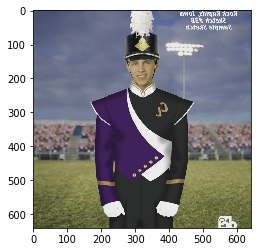

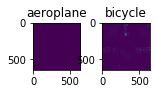

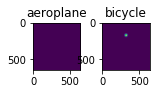

s
w: 76.25 h: 93.125 output:        w: 35.19543 h: 48.341087
<PIL.Image.Image image mode=RGB size=640x640 at 0x7F777C18F630>


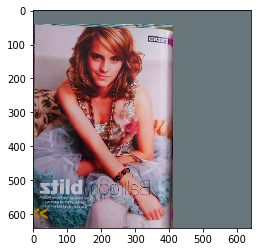

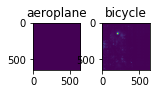

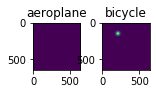

s
w: 105.43764 h: 142.13698 output:        w: 71.43126 h: 99.6775
<PIL.Image.Image image mode=RGB size=640x640 at 0x7F777C77C978>


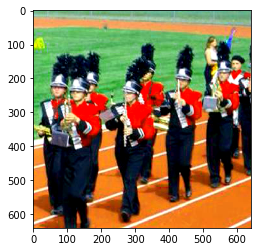

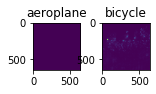

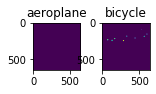

s
w: 18.874802 h: 22.649761 output:        w: 7.291176 h: 9.485664
w: 26.42472 h: 32.087162 output:        w: 11.90369 h: 15.14518
w: 30.199682 h: 32.087162 output:        w: 12.042152 h: 15.2151375
w: 28.3122 h: 32.087162 output:        w: 11.519251 h: 14.410959
w: 33.97464 h: 28.3122 output:        w: 10.156288 h: 12.640291
w: 32.087162 h: 35.86212 output:        w: 5.460727 h: 7.068844
w: 41.524563 h: 32.087162 output:        w: 11.826096 h: 14.631859
w: 39.63708 h: 39.63708 output:        w: 11.682175 h: 15.132656
w: 30.199682 h: 37.749603 output:        w: 9.844191 h: 12.2915
<PIL.Image.Image image mode=RGB size=640x640 at 0x7F776463DB70>


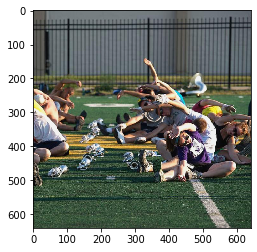

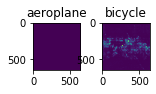

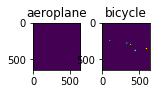

s
w: 30.967741 h: 27.214077 output:        w: 8.709888 h: 11.242363
w: 37.536655 h: 33.78299 output:        w: 14.374279 h: 18.224112
w: 41.29032 h: 24.398827 output:        w: 7.1748457 h: 9.26392
w: 46.920822 h: 33.78299 output:        w: 5.686226 h: 7.345201
w: 52.55132 h: 40.351906 output:        w: 9.619583 h: 12.405579
<PIL.Image.Image image mode=RGB size=640x640 at 0x7F77564A5320>


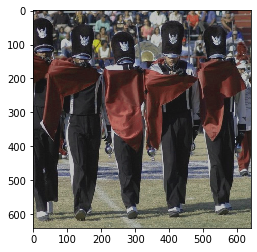

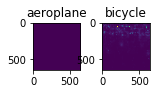

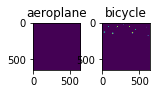

s
w: 8.262911 h: 7.511737 output:        w: 2.1471705 h: 2.8237405
w: 9.765258 h: 9.765258 output:        w: 2.1471705 h: 2.8237405
w: 9.765258 h: 10.516432 output:        w: 2.1471705 h: 2.8237405
w: 9.014085 h: 11.267606 output:        w: 2.1471705 h: 2.8237405
w: 13.521127 h: 11.267606 output:        w: 2.1471705 h: 2.8237405
w: 11.267606 h: 12.769953 output:        w: 2.1471705 h: 2.8237405
w: 13.521127 h: 12.769953 output:        w: 2.3160627 h: 3.0326416
w: 9.014085 h: 13.521127 output:        w: 3.282761 h: 4.2658577
w: 12.01878 h: 11.267606 output:        w: 6.025215 h: 7.795798
w: 12.01878 h: 12.01878 output:        w: 2.3074796 h: 3.0223982
w: 12.769953 h: 9.765258 output:        w: 3.8162131 h: 4.9528837
w: 10.516432 h: 12.769953 output:        w: 3.703671 h: 4.806845
w: 12.01878 h: 11.267606 output:        w: 2.1471705 h: 2.8237405
w: 10.516432 h: 15.023474 output:        w: 6.406938 h: 8.288155
w: 10.516432 h: 15.774648 output:        w: 2.1471705 h: 2.8237405
w: 12.769953

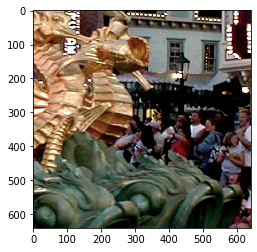

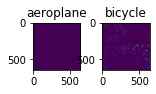

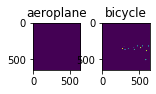

s
w: 26.589485 h: 32.15389 output:        w: 7.001882 h: 9.025706
w: 23.04422 h: 32.15389 output:        w: 7.340145 h: 9.480867
w: 26.589485 h: 37.230816 output:        w: 10.169798 h: 12.7639885
w: 15.953691 h: 22.000029 output:        w: 2.1471705 h: 2.8237405
w: 21.271587 h: 22.000029 output:        w: 3.7518816 h: 4.8636847
w: 26.589485 h: 35.53851 output:        w: 6.5845075 h: 8.50803
w: 21.271587 h: 32.15389 output:        w: 2.6561706 h: 3.4605813
w: 17.726322 h: 22.000029 output:        w: 3.720292 h: 4.824081
w: 26.589485 h: 35.53851 output:        w: 2.1471705 h: 2.8237405
w: 21.271587 h: 28.769268 output:        w: 7.797053 h: 9.963354
w: 28.362116 h: 35.53851 output:        w: 8.271684 h: 10.6319065
w: 26.589485 h: 35.53851 output:        w: 7.5159683 h: 9.660035
<PIL.Image.Image image mode=RGB size=640x640 at 0x7F7755EFA278>


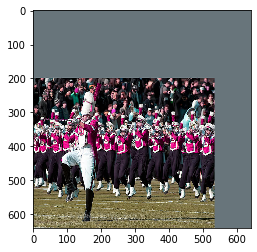

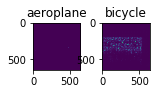

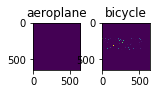

s
w: 8.324299 h: 10.22432 output:        w: 2.1471705 h: 2.8237405
w: 8.844567 h: 12.630042 output:        w: 2.1471705 h: 2.8237405
w: 7.2837615 h: 12.630042 output:        w: 2.350834 h: 3.0775635
w: 9.364836 h: 13.832904 output:        w: 7.117005 h: 9.222355
w: 9.885105 h: 12.028612 output:        w: 6.616724 h: 8.569019
w: 8.844567 h: 12.630042 output:        w: 7.6165233 h: 9.91893
w: 8.844567 h: 15.035765 output:        w: 2.242304 h: 2.9410563
w: 7.80403 h: 12.028612 output:        w: 2.4830508 h: 3.2434392
w: 8.324299 h: 13.231473 output:        w: 2.407532 h: 3.1482456
w: 8.844567 h: 11.427181 output:        w: 2.1471705 h: 2.8237405
w: 8.844567 h: 11.427181 output:        w: 4.8382254 h: 6.266309
w: 8.844567 h: 12.028612 output:        w: 2.1471705 h: 2.8237405
w: 8.324299 h: 13.231473 output:        w: 2.1471705 h: 2.8237405
w: 10.405374 h: 11.427181 output:        w: 3.3072567 h: 4.297919
w: 7.80403 h: 10.22432 output:        w: 2.1471705 h: 2.8237405
w: 11.44591 h: 16.840

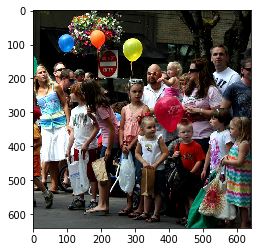

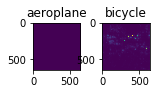

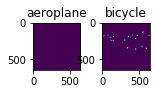

s
w: 42.611427 h: 55.083065 output:        w: 18.249712 h: 22.51375
w: 29.100489 h: 37.414913 output:        w: 15.707436 h: 19.924442
w: 29.100489 h: 36.37561 output:        w: 16.211987 h: 20.864378
w: 24.098719 h: 53.00446 output:        w: 23.060545 h: 29.69405
w: 34.297005 h: 53.00446 output:        w: 17.802845 h: 22.18255
w: 31.179094 h: 42.611427 output:        w: 17.66876 h: 22.397934
w: 39.49352 h: 43.650734 output:        w: 15.915493 h: 20.435406
w: 15.589547 h: 22.86467 output:        w: 2.237779 h: 2.9354577
w: 23.903973 h: 25.982578 output:        w: 8.784721 h: 11.16412
w: 22.86467 h: 32.2184 output:        w: 14.596048 h: 18.54272
w: 27.021881 h: 38.454216 output:        w: 19.136265 h: 24.306677
w: 25.982578 h: 29.100489 output:        w: 17.68134 h: 22.288857
w: 38.454216 h: 48.847248 output:        w: 22.520477 h: 30.21237
w: 29.100489 h: 38.454216 output:        w: 22.226606 h: 28.55226
w: 27.021881 h: 44.690037 output:        w: 20.092201 h: 25.817394
w: 14.550244

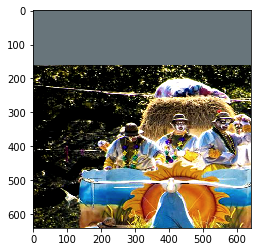

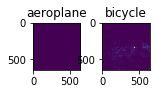

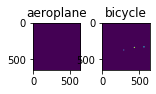

s
w: 38.45758 h: 36.03395 output:        w: 16.984827 h: 21.665268
w: 38.45758 h: 34.747025 output:        w: 7.4044166 h: 9.289611
w: 36.85518 h: 25.738535 output:        w: 6.6779785 h: 8.101662
<PIL.Image.Image image mode=RGB size=640x640 at 0x7F7755CE2EF0>


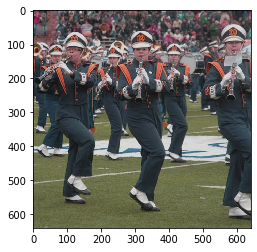

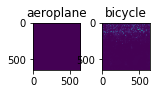

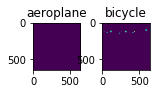

s
w: 47.023197 h: 48.831783 output:        w: 18.340366 h: 23.445301
w: 14.468677 h: 18.990139 output:        w: 10.94644 h: 14.010294
w: 17.181553 h: 26.224476 output:        w: 4.2115827 h: 5.4604263
w: 43.40603 h: 55.16183 output:        w: 18.474356 h: 22.820696
w: 14.468677 h: 13.564384 output:        w: 2.1471705 h: 2.8237405
w: 11.755799 h: 13.564384 output:        w: 5.757806 h: 7.4551477
w: 43.40603 h: 51.54466 output:        w: 8.593347 h: 10.49702
w: 19.89443 h: 18.990139 output:        w: 5.315235 h: 6.871864
w: 15.372969 h: 18.085846 output:        w: 9.066626 h: 11.586359
w: 29.841646 h: 33.458817 output:        w: 4.359638 h: 5.404688
w: 27.128769 h: 30.745937 output:        w: 10.088343 h: 13.858744
w: 26.224476 h: 31.65023 output:        w: 6.2492204 h: 7.737197
<PIL.Image.Image image mode=RGB size=640x640 at 0x7F7755BEF898>


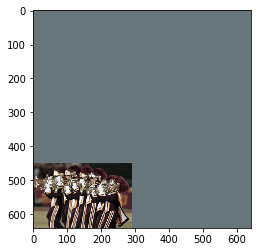

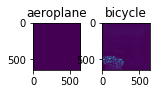

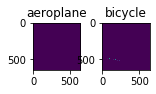

KeyboardInterrupt: 

In [38]:
from models.utils import _sigmoid
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,1,3)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,1,3)
def draw_pic_hm(data,batch_output,batch_hm):
    classes=["aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", 
"horse", "motorbike", "person", "pottedplant", "sheep", "sofa", 
"train", "tvmonitor"]
    for pic,output,hm in zip(data,batch_output,batch_hm):
        plt.imshow(((pic.permute((1,2,0))*std+mean)*255).int())
        j=Image.fromarray(((pic.permute((1,2,0))*std+mean)*255).numpy().astype(np.uint8))
        print(j)
        j.save('src.jpeg')
        plt.show()
        for index,(out_hm) in enumerate(output):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(out_hm)
            j=Image.fromarray(((out_hm.numpy()[:,:,np.newaxis].repeat(3,2)*255)).astype(np.uint8))
            j.save('output.jpg')
        plt.show()
        for index,(label_hm) in enumerate(hm):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(label_hm)
            j=Image.fromarray(((label_hm.numpy()[:,:,np.newaxis].repeat(3,2)*255)).astype(np.uint8))
            j.save('hm.jpg')
        plt.show()
        input('s')
model.eval()
for index,batch in enumerate(train_loader):
    data=batch['input']
    data=data.cuda(0)
    output,=model(data)
    draw_pic_hm(data.cpu().detach(),_sigmoid(output['hm'].cpu().detach()),batch['hm'][:1].cpu().detach())
    label_wh=batch['wh']
    output_wh=output['wh']
    mask=batch['mask']
    indexs=np.argwhere(mask==1)
    for _,_,i,j in indexs.transpose(0,1):
        print('w:',label_wh[0,0,i,j].cpu().numpy(),'h:',label_wh[0,1,i,j].cpu().numpy(),'output:       ','w:',output_wh[0,0,i,j].cpu().detach().numpy(),'h:',output_wh[0,1,i,j].cpu().detach().numpy())

In [26]:
label_wh=batch['wh']
output_wh=output['wh']
mask=batch['mask']

In [31]:
indexs=np.argwhere(mask==1)

In [32]:
print(indexs.shape)

torch.Size([4, 20])


In [37]:
for _,_,i,j in indexs.transpose(0,1):
    print('w:',label_wh[0,0,i,j].cpu().numpy(),'h:',label_wh[0,1,i,j].cpu().numpy(),'output:       ','w:',output_wh[0,0,i,j].cpu().detach().numpy(),'h:',output_wh[0,1,i,j].cpu().detach().numpy())

w: 42.611427 h: 55.083065 output:        w: 18.24971 h: 22.513748

w: 29.100489 h: 37.414913 output:        w: 15.707439 h: 19.924448

w: 29.100489 h: 36.37561 output:        w: 16.211987 h: 20.864378

w: 24.098719 h: 53.00446 output:        w: 23.060547 h: 29.694056

w: 34.297005 h: 53.00446 output:        w: 17.802845 h: 22.18255

w: 31.179094 h: 42.611427 output:        w: 17.668762 h: 22.397936

w: 39.49352 h: 43.650734 output:        w: 15.915493 h: 20.435408

w: 15.589547 h: 22.86467 output:        w: 2.2377791 h: 2.9354582

w: 23.903973 h: 25.982578 output:        w: 8.784726 h: 11.164127

w: 22.86467 h: 32.2184 output:        w: 14.596054 h: 18.542725

w: 27.021881 h: 38.454216 output:        w: 19.136265 h: 24.306679

w: 25.982578 h: 29.100489 output:        w: 17.68134 h: 22.288857

w: 38.454216 h: 48.847248 output:        w: 22.52048 h: 30.21238

w: 29.100489 h: 38.454216 output:        w: 22.226616 h: 28.552265

w: 27.021881 h: 44.690037 output:        w: 20.092209 h: 25.81

In [24]:
output=output[0]
output['hm']

tensor([[[[-81.6029, -72.0977, -73.3409,  ..., -70.2726, -70.3051, -89.1292],
          [-75.3790, -48.1168, -45.4178,  ..., -46.3167, -41.7691, -83.8515],
          [-73.3653, -42.3705, -47.9687,  ..., -42.8354, -34.3943, -78.1909],
          ...,
          [-72.7457, -44.3702, -45.1605,  ..., -55.6158, -45.1376, -89.2634],
          [-71.4020, -41.7082, -39.7103,  ..., -48.5021, -46.2898, -88.0074],
          [-80.1382, -75.5290, -71.5744,  ..., -79.8435, -78.1372, -92.6142]],

         [[ -8.2845,  -7.5367,  -7.3859,  ...,  -7.1424,  -7.3215,  -9.0543],
          [ -7.7903,  -4.9218,  -4.6155,  ...,  -4.6984,  -4.2330,  -8.7017],
          [ -7.5569,  -4.3027,  -4.8221,  ...,  -4.3108,  -3.4168,  -8.0882],
          ...,
          [ -7.4887,  -4.5162,  -4.5801,  ...,  -5.6428,  -4.5708,  -9.2212],
          [ -7.3623,  -4.2913,  -4.0282,  ...,  -4.9668,  -4.7285,  -9.1632],
          [ -8.2450,  -7.9124,  -7.4796,  ...,  -8.3460,  -8.1689,  -9.7568]]]],
       grad_fn=<MkldnnConvolu

In [2]:
from utils.widerface import WIDERDetection, detection_collate
from utils.config import cfg
from torch.utils.data import DataLoader, Dataset
train_dataset = WIDERDetection(cfg.FACE.TRAIN_FILE, mode='train')

val_dataset = WIDERDetection(cfg.FACE.VAL_FILE, mode='val')

train_loader = DataLoader(train_dataset, 5,
                               num_workers=1,
                               shuffle=True,
#                                collate_fn=detection_collate,
                               pin_memory=True)
val_batchsize = 5
val_loader = DataLoader(val_dataset, 1,
                             num_workers=0,
                             shuffle=False,
#                              collate_fn=,
                             pin_memory=True)


In [17]:
for k in val_loader:
    input('s')

s


KeyboardInterrupt: 

In [ ]:
for n,v in k.items():
    print(n,v.shape)

In [18]:
from models.losses import FaL1Loss
crit_reg = FaL1Loss()
img=k['input']
wh=k['wh']
hm=k['hm']
mask=k['mask']
offset=k['offset']

In [19]:
import torch
print(wh.shape)

torch.Size([1, 2, 640, 640])


In [20]:
crit_reg(torch.ones(1,2,640,640),mask,wh)

tensor(17.5624)

In [6]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
print(offset[0,0,99,320])
# print((hm[:,1,:,:]==1).sum())
# im = Image.fromarray((hm[:,1,:,:].numpy().transpose(1,2,0).repeat(3,2)*255).astype(np.uint8))
# im.save("your_file.jpeg")
# plt.figure(figsize=(320,320))
# plt.imshow(hm[0,1,:,:])
# plt.show()
# plt.imshow(mask[0,0,:,:])

tensor(0.)


torch.Size([1, 3, 640, 640])
torch.Size([640, 640, 3])
torch.Size([640, 640, 3])


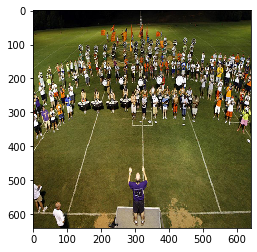

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [6]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
mean=torch.tensor([123., 117.,104.])
mean=mean.reshape(1,1,3)
print(img.shape)
pic=img[0].permute(1,2,0)
print(pic.shape)
pic=pic+mean/255
print(pic.shape)
plt.imshow(pic)
plt.show()
print(mask[0][0][200:300,:30])

tensor([123., 117., 104.])
tensor([[[ -66.,  -67.,  -67.,  ..., -100., -100., -101.],
         [ -66.,  -67.,  -67.,  ..., -100., -100., -101.],
         [ -66.,  -66.,  -66.,  ..., -101., -101., -101.],
         ...,
         [  60.,   66.,   67.,  ...,  -51.,  -50.,  -47.],
         [  60.,   66.,   67.,  ...,  -51.,  -50.,  -47.],
         [  58.,   63.,   64.,  ...,  -52.,  -51.,  -45.]],

        [[ -37.,  -36.,  -36.,  ...,  -85.,  -85.,  -86.],
         [ -37.,  -36.,  -36.,  ...,  -85.,  -85.,  -86.],
         [ -35.,  -35.,  -35.,  ...,  -86.,  -86.,  -86.],
         ...,
         [  46.,   51.,   52.,  ...,  -37.,  -36.,  -32.],
         [  46.,   51.,   52.,  ...,  -37.,  -36.,  -32.],
         [  44.,   49.,   50.,  ...,  -36.,  -36.,  -32.]],

        [[ -63.,  -64.,  -64.,  ...,  -78.,  -78.,  -79.],
         [ -63.,  -64.,  -64.,  ...,  -78.,  -79.,  -79.],
         [ -63.,  -65.,  -65.,  ...,  -79.,  -79.,  -79.],
         ...,
         [  32.,   37.,   38.,  ...,   86.

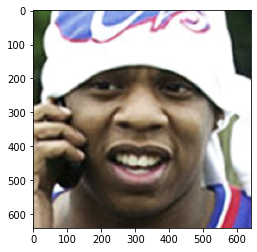

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
mean=torch.tensor([123., 117.,104.])
print(mean)
mean=mean.reshape(1,1,3)
print(k[0][1])
img=k[0][1].permute((1,2,0))
print(img+mean)
plt.imshow((img+mean).int())
plt.show()

In [26]:
k[0].shape

torch.Size([5, 3, 640, 640])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


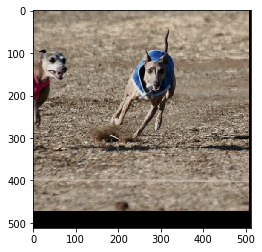

tensor(517)
tensor(562)


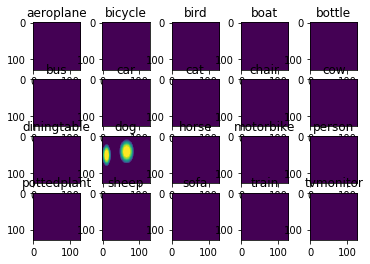

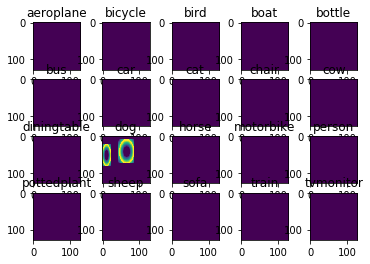

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


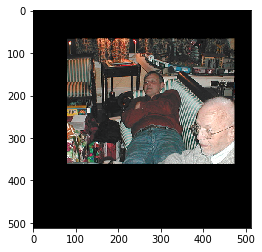

tensor(974)
tensor(1084)


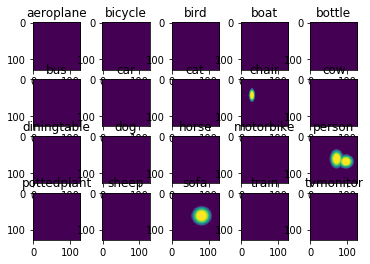

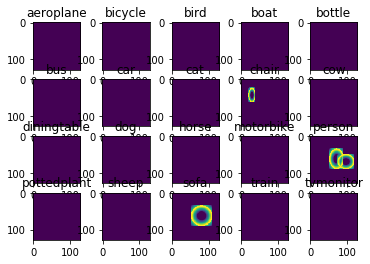

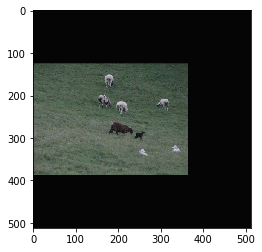

tensor(58)
tensor(45)


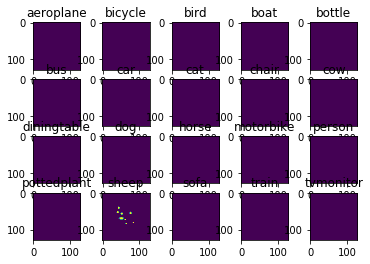

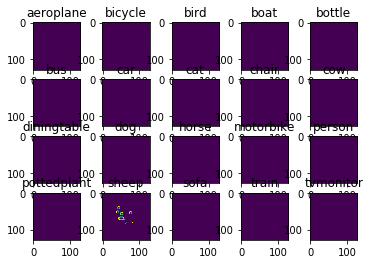

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


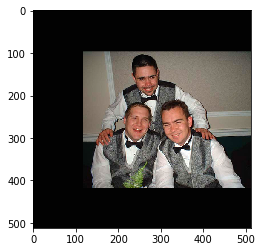

tensor(1107)
tensor(1218)


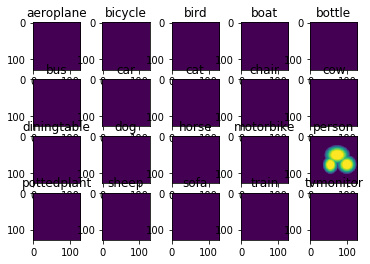

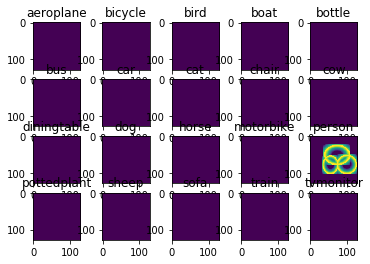

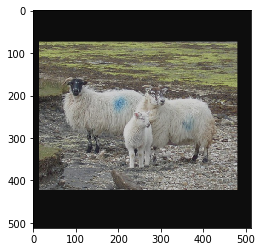

tensor(651)
tensor(676)


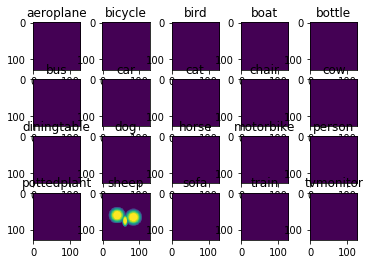

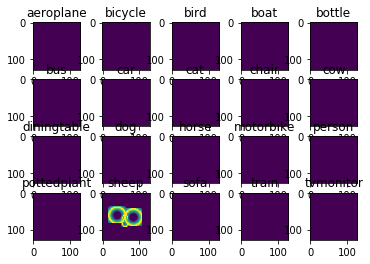

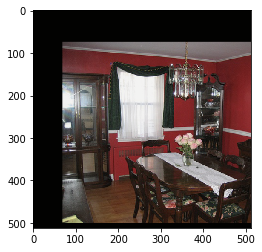

tensor(740)
tensor(823)


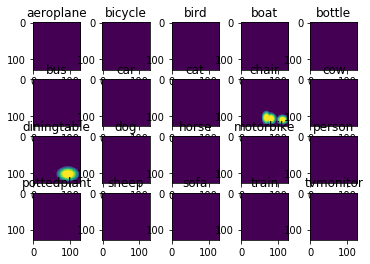

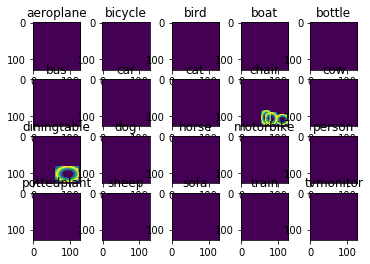

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


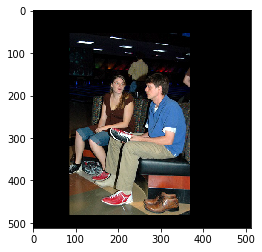

tensor(1408)
tensor(1600)


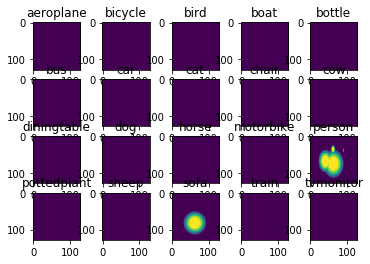

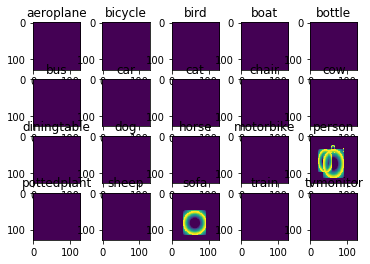

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


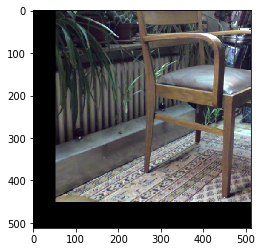

tensor(1037)
tensor(1208)


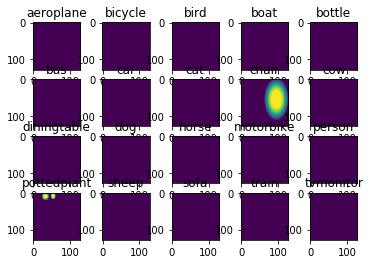

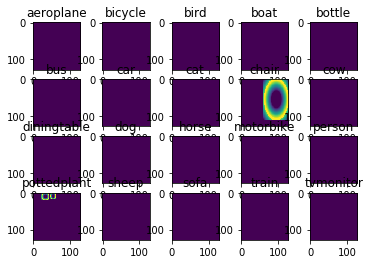

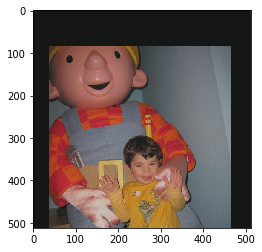

tensor(398)
tensor(457)


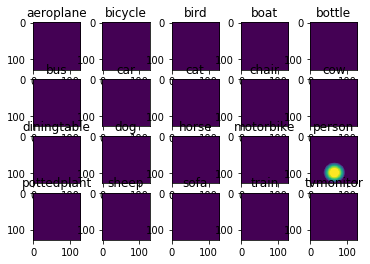

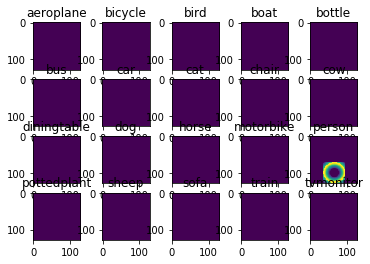

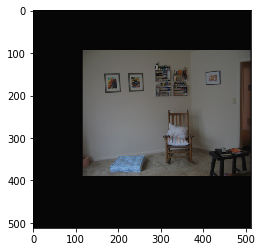

tensor(80)
tensor(78)


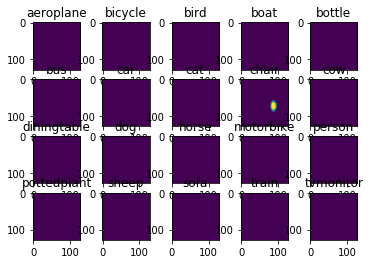

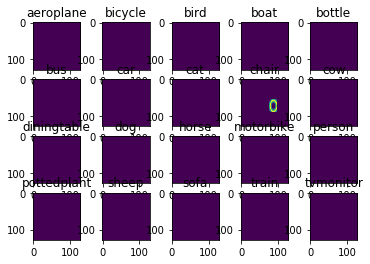

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


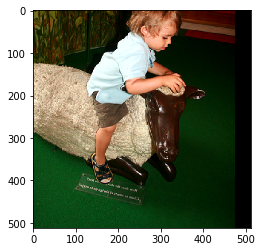

tensor(750)
tensor(855)


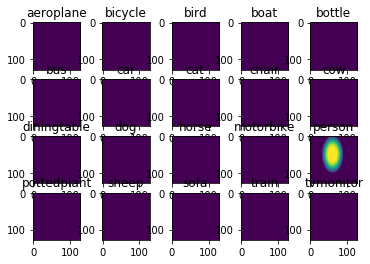

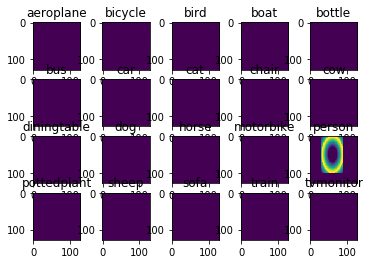

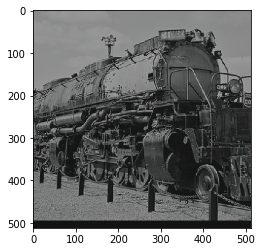

tensor(1654)
tensor(1958)


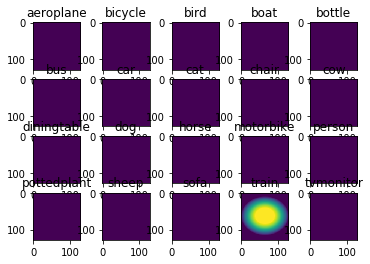

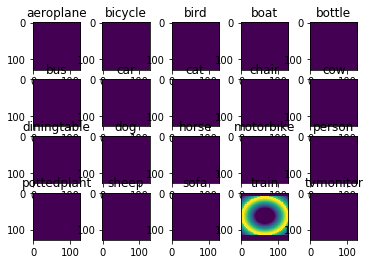

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


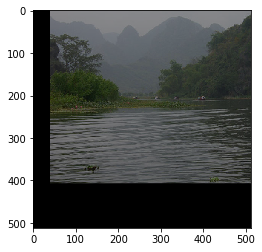

tensor(2)
tensor(3)


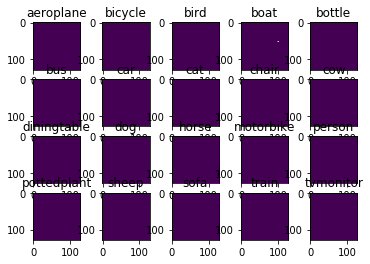

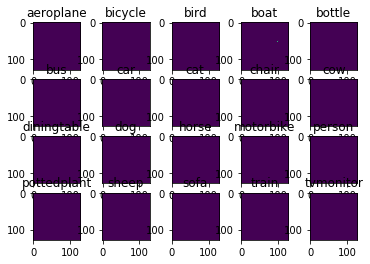

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


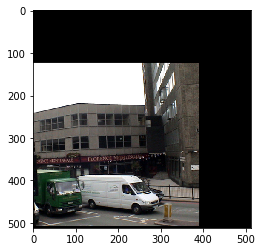

tensor(156)
tensor(172)


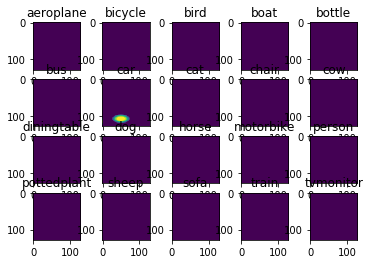

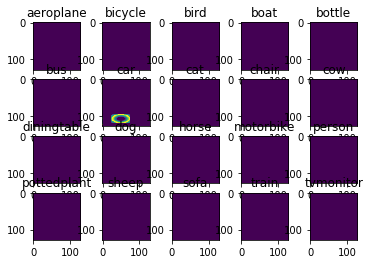

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


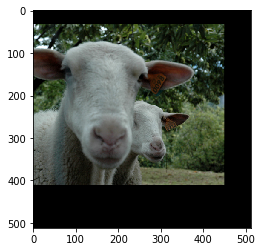

tensor(1302)
tensor(1438)


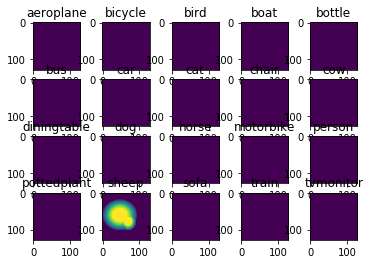

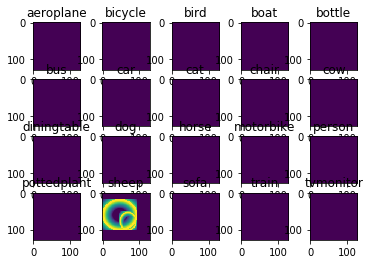

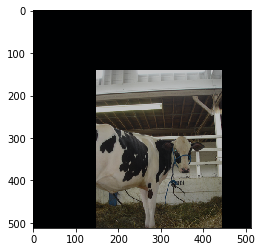

tensor(486)
tensor(563)


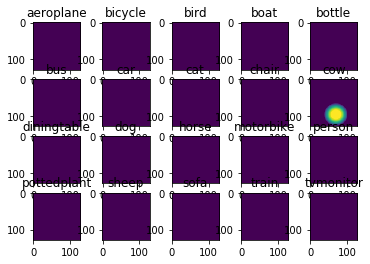

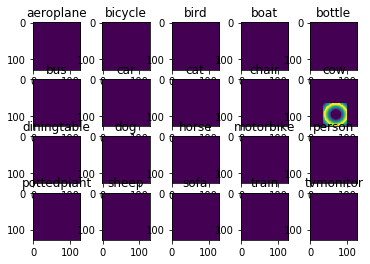

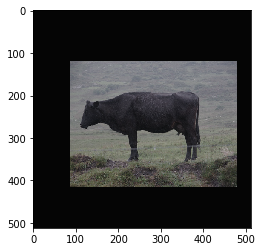

tensor(375)
tensor(431)


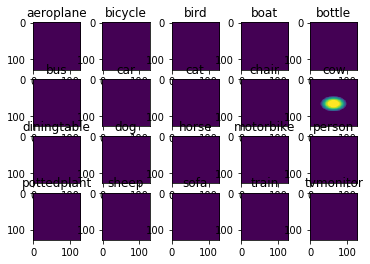

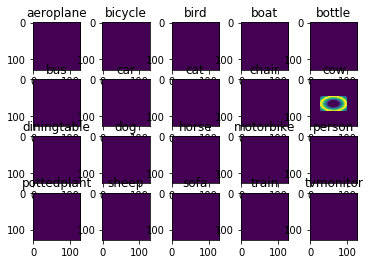

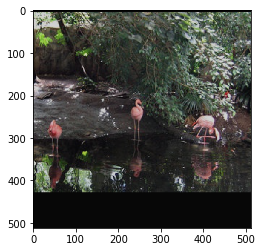

tensor(119)
tensor(110)


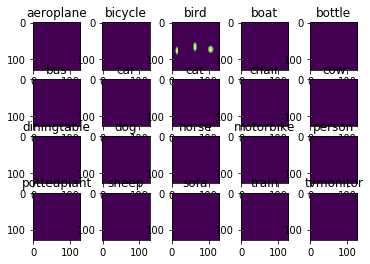

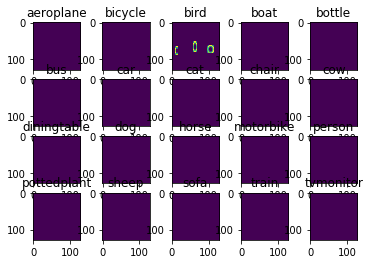

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


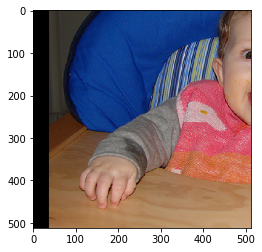

tensor(1477)
tensor(1730)


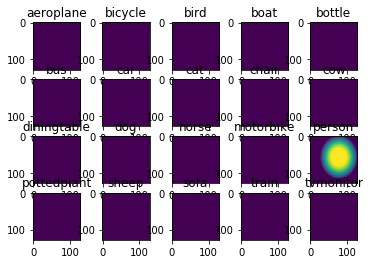

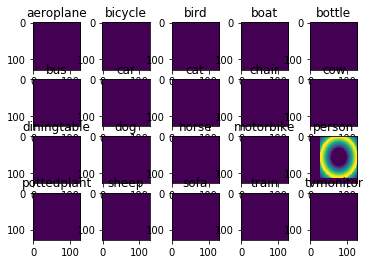

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


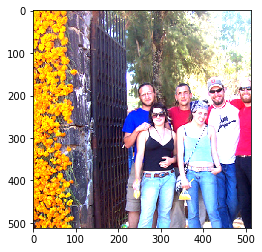

tensor(1405)
tensor(1694)


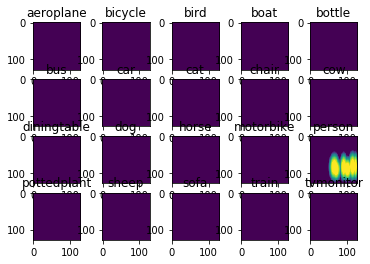

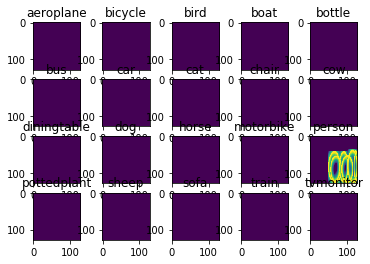

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


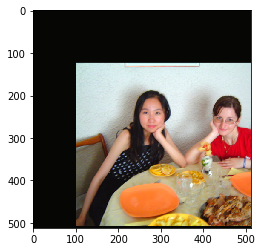

tensor(1495)
tensor(1687)


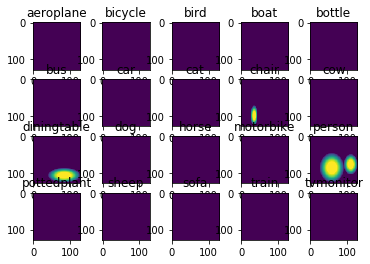

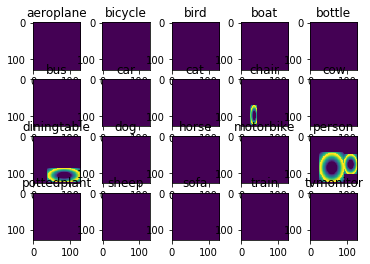

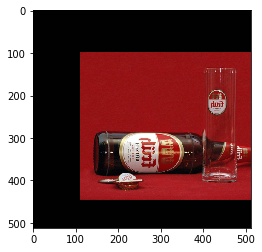

tensor(314)
tensor(351)


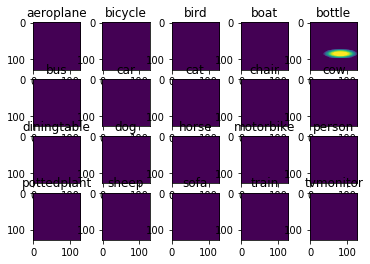

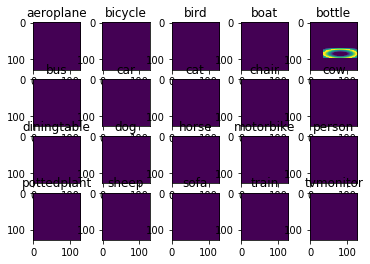

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


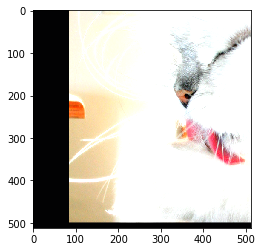

tensor(1667)
tensor(1944)


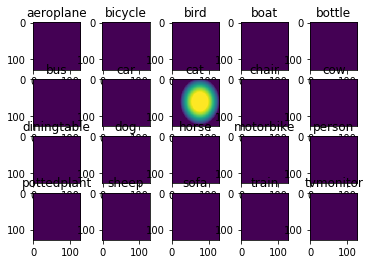

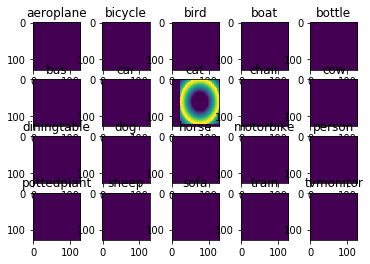

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


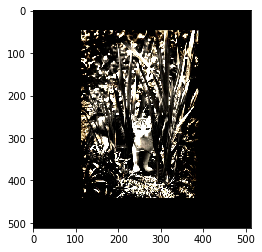

tensor(184)
tensor(197)


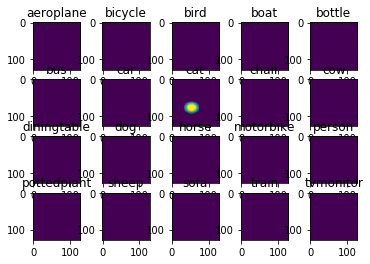

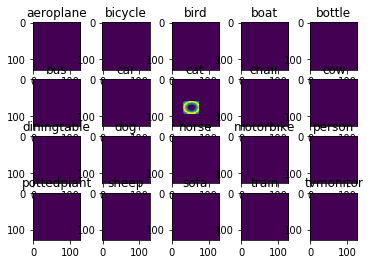

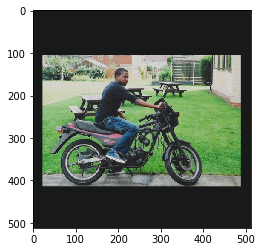

tensor(903)
tensor(1035)


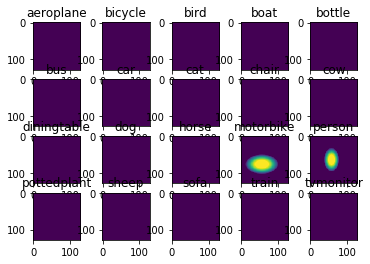

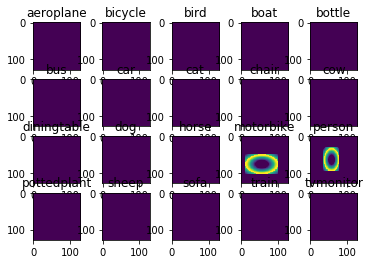

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


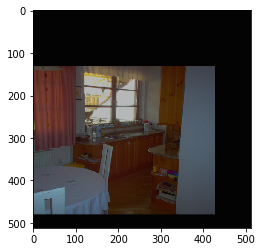

tensor(227)
tensor(235)


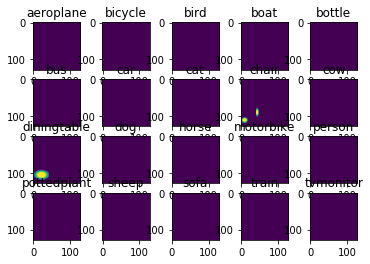

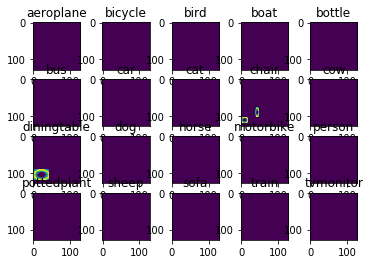

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


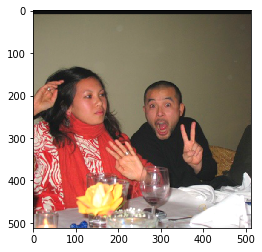

tensor(1822)
tensor(2048)


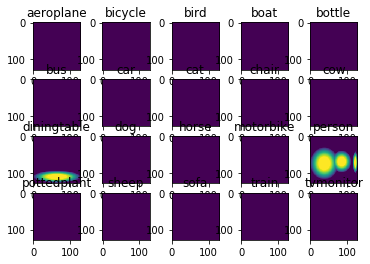

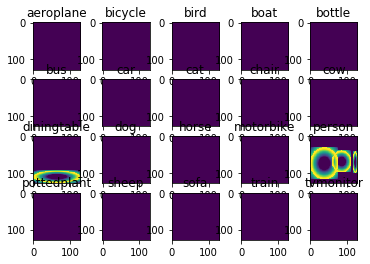

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


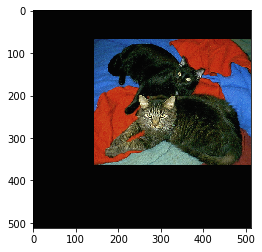

tensor(740)
tensor(836)


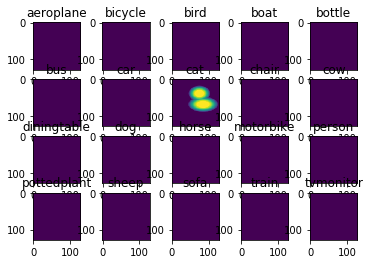

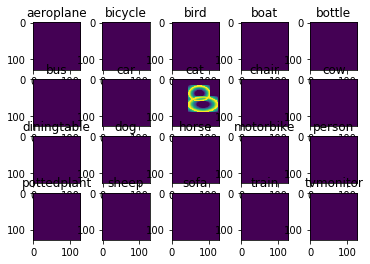

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


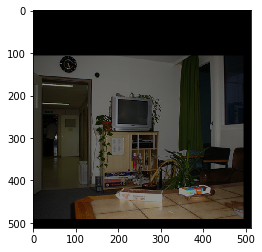

tensor(556)
tensor(576)


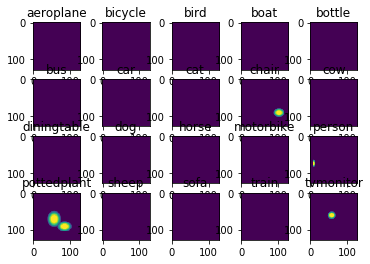

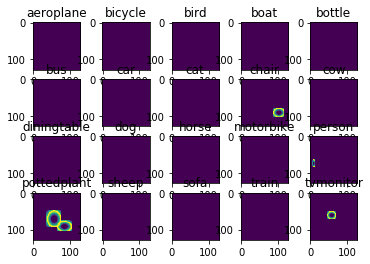

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


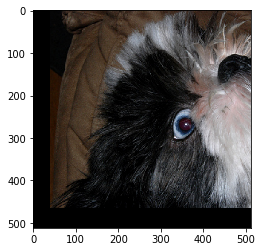

tensor(1709)
tensor(2011)


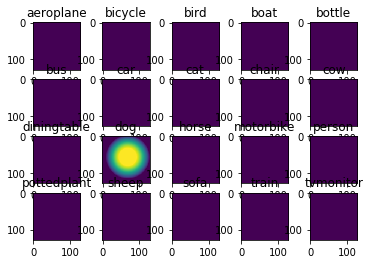

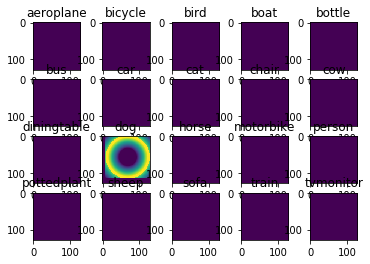

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


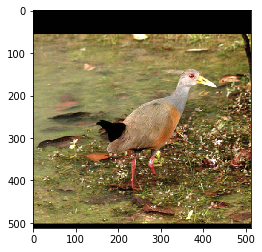

tensor(632)
tensor(746)


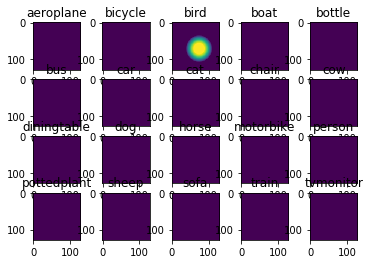

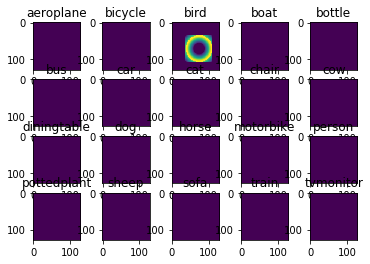

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


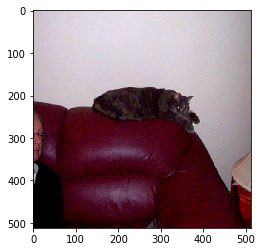

tensor(1571)
tensor(1775)


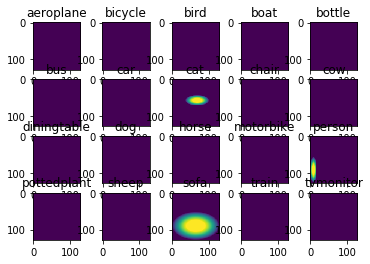

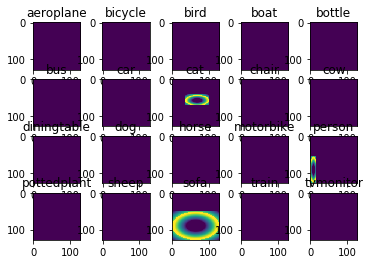

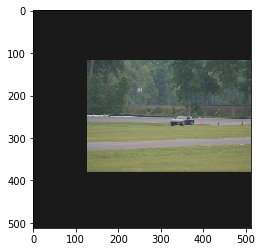

tensor(12)
tensor(12)


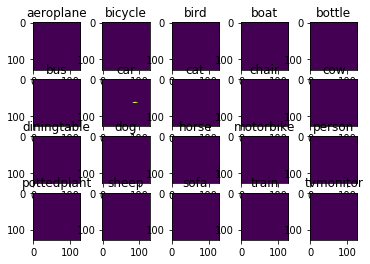

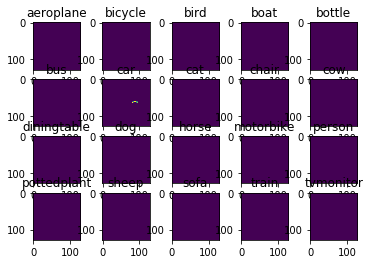

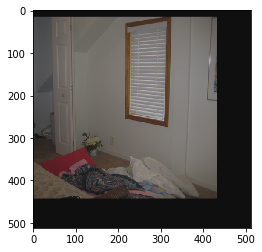

tensor(237)
tensor(246)


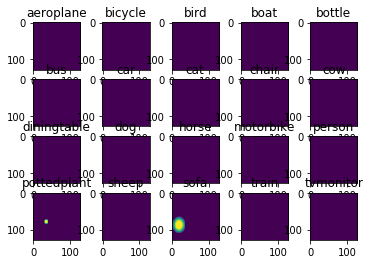

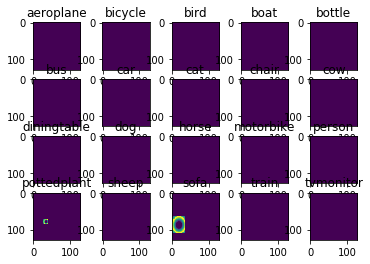

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


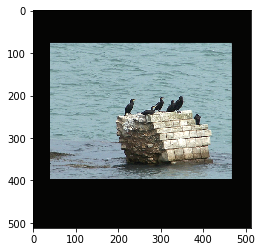

tensor(52)
tensor(36)


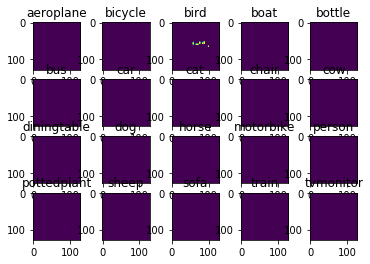

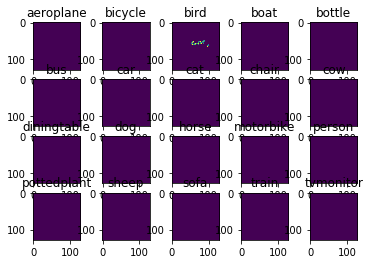

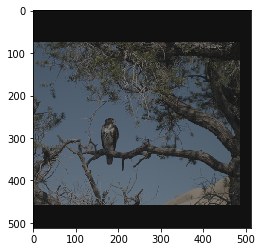

tensor(42)
tensor(35)


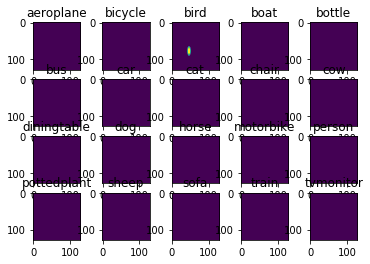

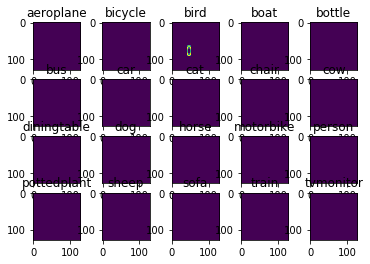

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


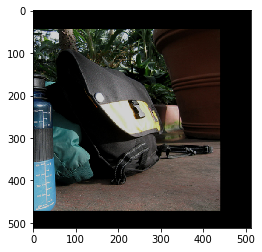

tensor(141)
tensor(137)


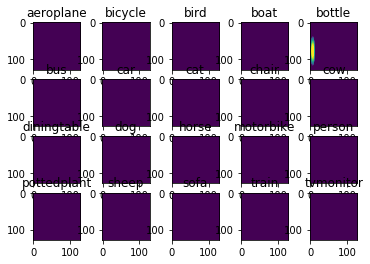

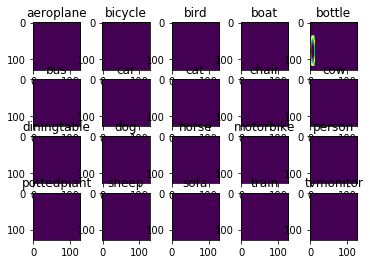

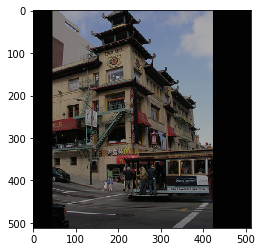

tensor(92)
tensor(73)


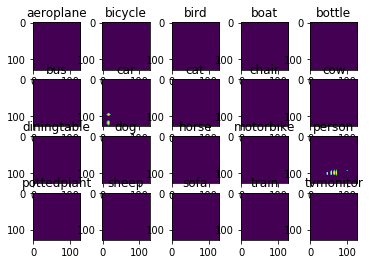

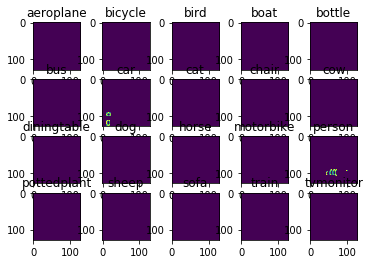

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


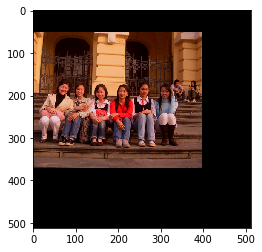

tensor(504)
tensor(482)


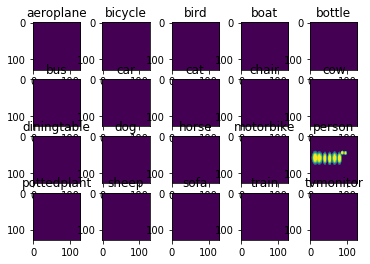

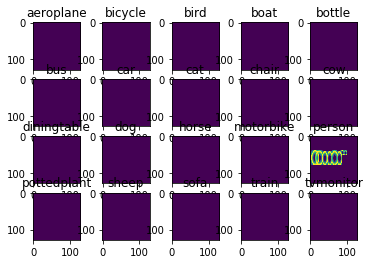

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


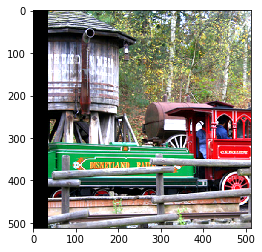

tensor(931)
tensor(1083)


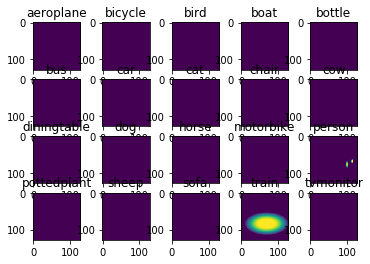

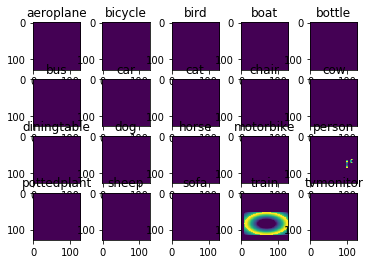

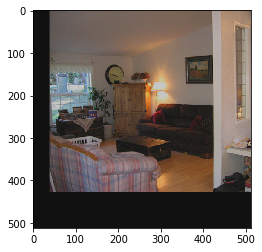

tensor(543)
tensor(544)


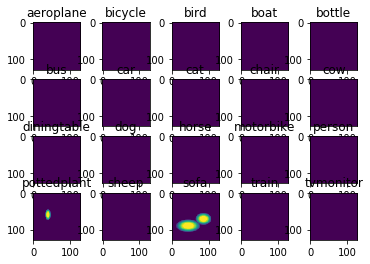

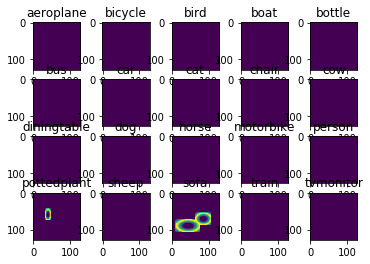

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


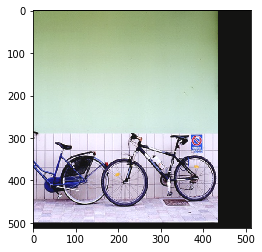

tensor(641)
tensor(685)


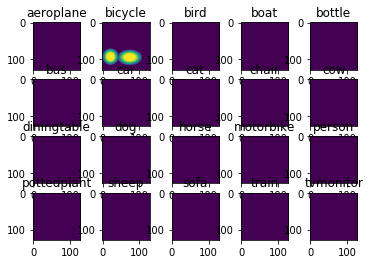

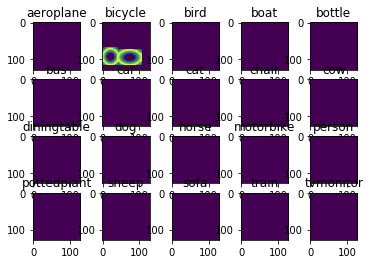

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


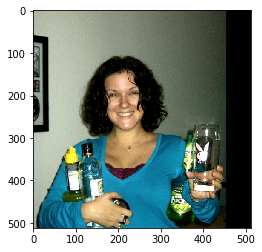

tensor(1664)
tensor(1929)


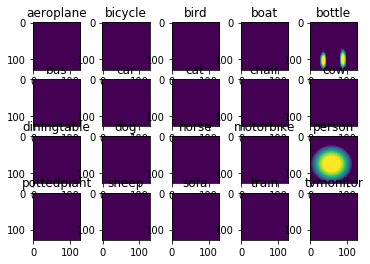

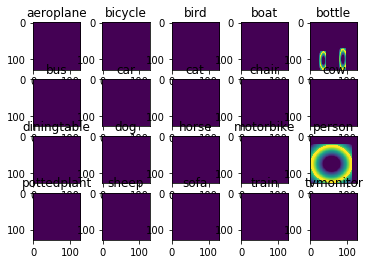

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


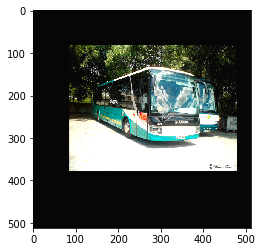

tensor(460)
tensor(498)


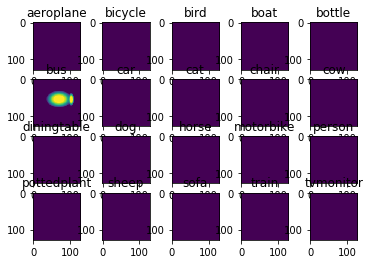

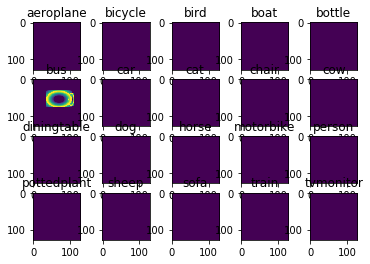

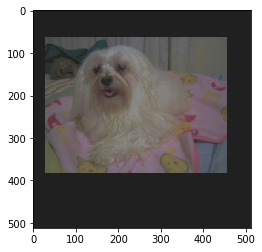

tensor(613)
tensor(717)


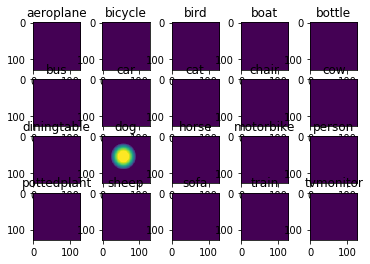

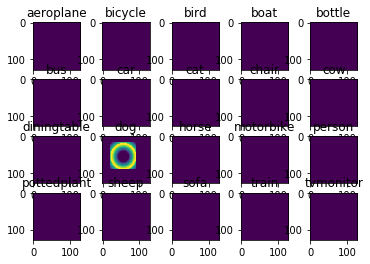

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


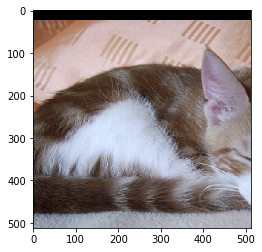

tensor(1564)
tensor(1818)


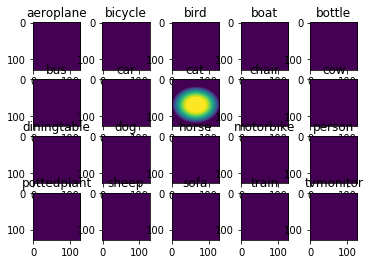

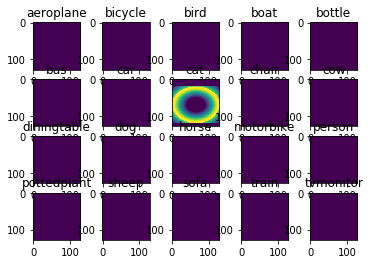

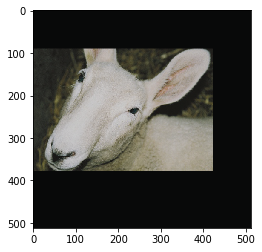

tensor(900)
tensor(1038)


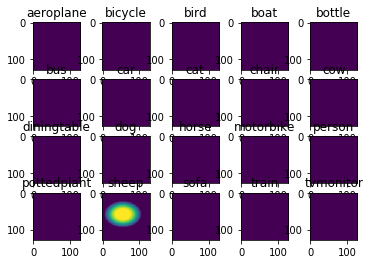

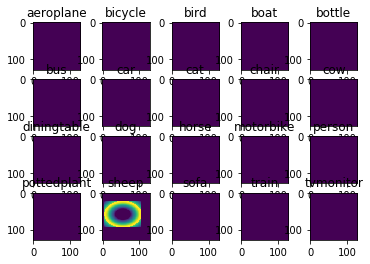

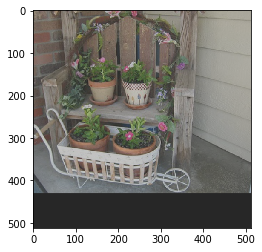

tensor(384)
tensor(409)


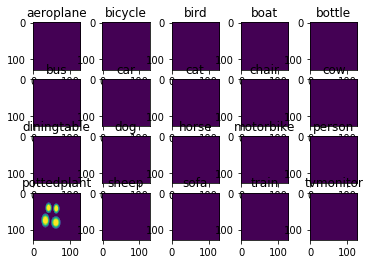

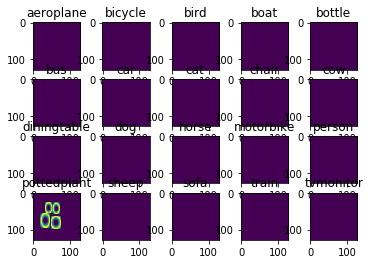

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,1,3)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,1,3)
def draw_pic_hm(data,hm_inter,hm_bound):
    classes=["aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", 
"horse", "motorbike", "person", "pottedplant", "sheep", "sofa", 
"train", "tvmonitor"]
    for pic,inter,bound in zip(data,hm_inter,hm_bound):
        plt.imshow(((pic.permute((1,2,0))*std+mean)*255).int())
        plt.show()
        print((inter==1).sum())
        print((bound==1).sum())
        for index,(label_hm) in enumerate(inter):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(label_hm)
        plt.show()
        for index,(label_hm) in enumerate(bound):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(label_hm)
        plt.show()
for index,batch in enumerate(train_loader):
    
    draw_pic_hm(batch['input'],batch['hm_inter'],batch['hm_bound'])
    input('s')

In [2]:
from models.model import create_model
import torch
heads = {'hm': 20,'wh': 2,'reg': 2 }
model = create_model('deeplab_resnet101',heads ,64)
state_dict=torch.load('/home/mayx/project/github/CenterNet/exp/ctdet/pascal_resnet18_inter_bound_rehm/model_last.pth')
for k,v in state_dict.items():
    print(k)
    if 'epoch' in k:
        print(v)
params=state_dict['state_dict']
model.cuda(0)
model.load_state_dict(params)

epoch
70
state_dict
optimizer


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


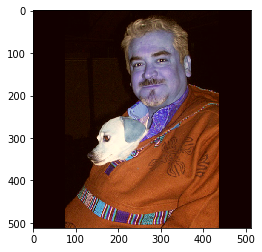

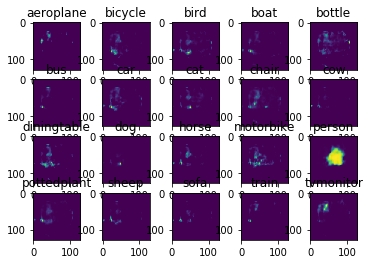

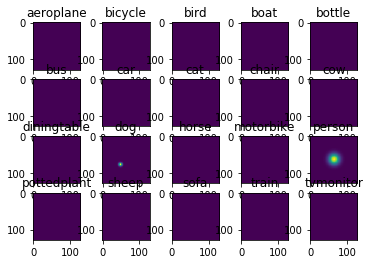

s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


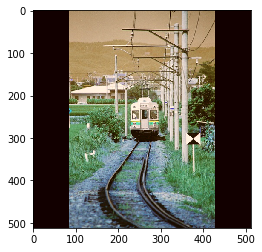

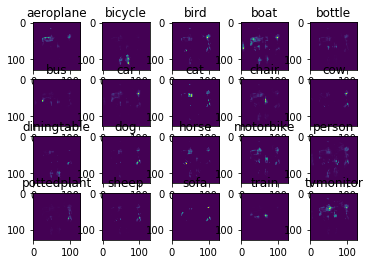

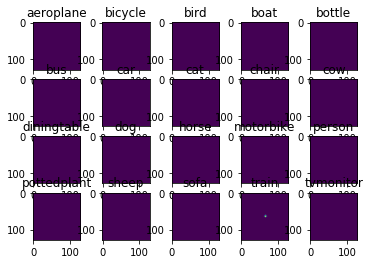

s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


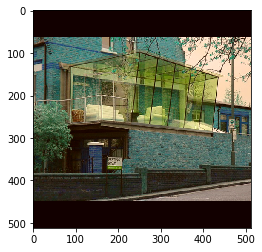

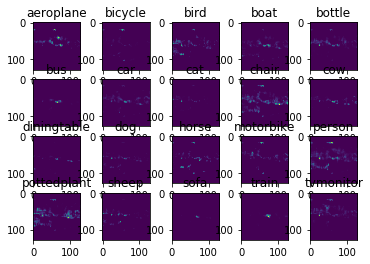

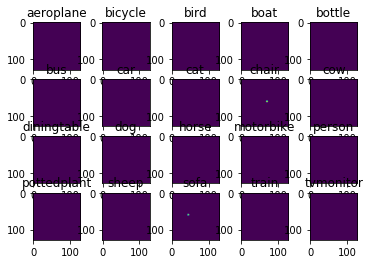

s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


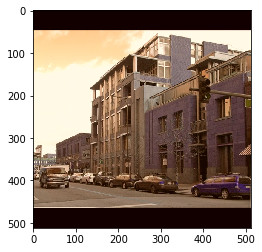

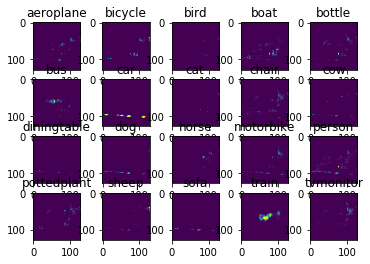

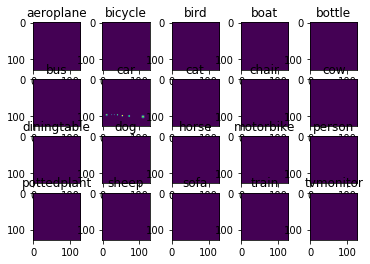

s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


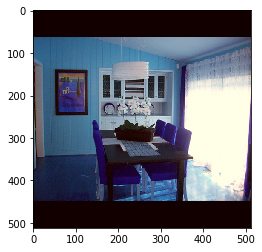

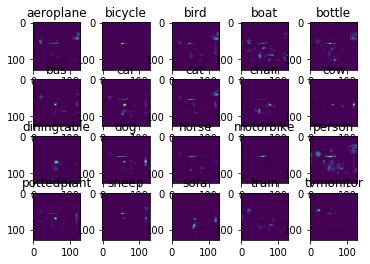

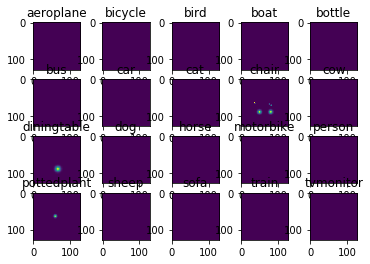

s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


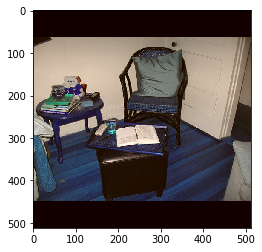

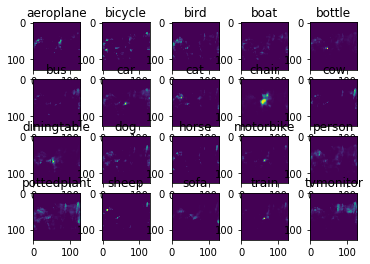

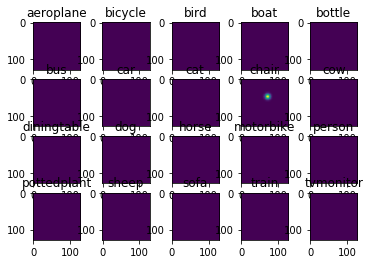

s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


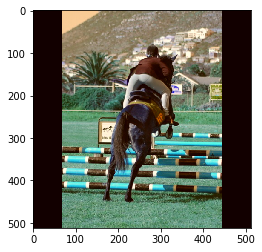

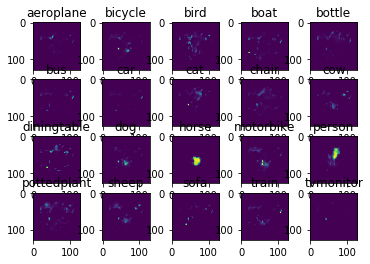

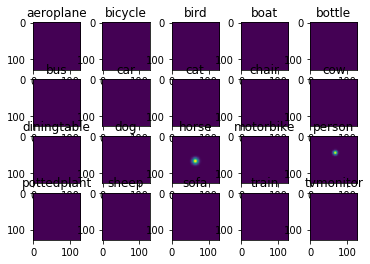

In [ ]:
from models.utils import _sigmoid
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,1,3)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,1,3)
def draw_pic_hm(data,batch_output,batch_hm):
    classes=["aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", 
"horse", "motorbike", "person", "pottedplant", "sheep", "sofa", 
"train", "tvmonitor"]
    for pic,output,hm in zip(data,batch_output,batch_hm):
        plt.imshow(((pic.permute((1,2,0))*std+mean)*255).int())
        plt.show()
        for index,(out_hm) in enumerate(output):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(out_hm)
        plt.show()
        for index,(label_hm) in enumerate(hm):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(label_hm)
        plt.show()
model.eval()
for index,batch in enumerate(val_loader):
    data=batch['input'][:2]
    data=data.cuda(0)
    data=data[:,(2,1,0),:,:]
    output,=model(data)
    draw_pic_hm(data.cpu().detach(),_sigmoid(output['hm'].cpu().detach()),batch['hm'][:1].cpu().detach())
#     print(output['wh'],output['wh'].shape)
#     print(output['reg'],output['reg'].shape)
#     print(batch['reg_mask'][:1],batch['reg_mask'][:1].shape)
    input('s')

In [13]:
print(batch['wh'][0])
print(batch['ind'][0])
print(batch['reg_mask'][0])
wh=output['wh'][0]
index=input('S')
print(wh)
wh=wh.view(2,-1)
print(wh[:,int(index)])
# print(wh.shape)
          

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0,

KeyboardInterrupt: 

In [ ]:
from models.losses import RegL1Loss, RegLoss, NormRegL1Loss, RegWeightedL1Loss
crit_reg = RegL1Loss()
crit_reg(output['wh'][:2], batch['reg_mask'][:2].cuda(2),batch['ind'][:2].cuda(2), batch['wh'][:2].cuda(2))